Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

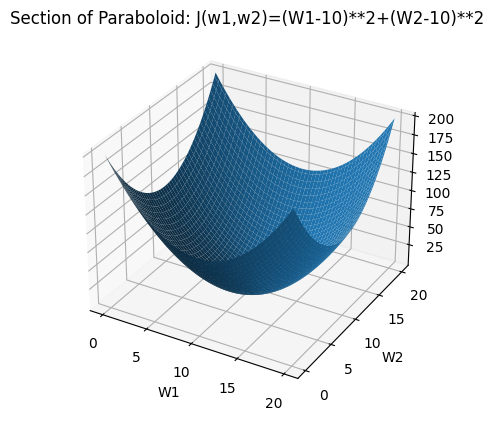

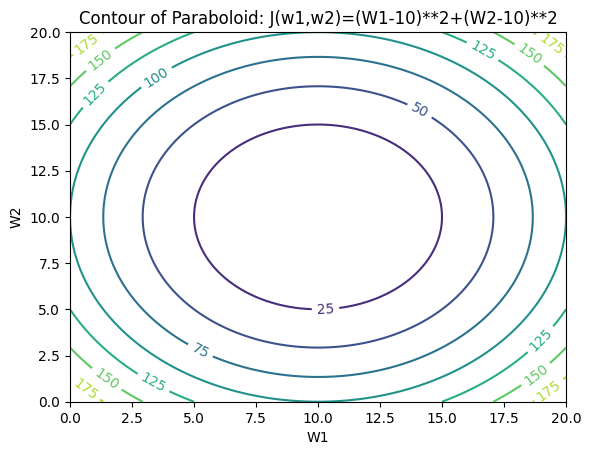

In [123]:
import matplotlib.pyplot as plt
import numpy as np

w1=np.linspace(0,20,100)
w2=np.linspace(0,20,100)

W1,W2=np.meshgrid(w1,w2)
J=(W1-10)**2+(W2-10)**2
#3D-Plotting:
fig1=plt.figure()
ax=fig1.add_subplot(111,projection='3d')

ax.plot_surface(W1,W2,J)
plt.title("Section of Paraboloid: J(w1,w2)=(W1-10)**2+(W2-10)**2")
plt.xlabel("W1")
plt.ylabel("W2")
plt.show()
#Contour Plotting:
fig2=plt.figure()
ax=fig2.add_subplot(111)

contour_plot=ax.contour(W1,W2,J)
ax.clabel(contour_plot)
plt.title("Contour of Paraboloid: J(w1,w2)=(W1-10)**2+(W2-10)**2")
plt.xlabel("W1")
plt.ylabel("W2")
plt.show()

In [2]:
#defining a,b,n
#a)
def J(w):
    try:
        return (w**2+54/w)
    except ZeroDivisionError:
        print("Warning: encountered division by 0!")
        return J(w-0.01)
 
def bracketing(a,b,n,J):
    dw=(b-a)/n 
    w1=a+dw
    maxi=mini=0
    for i in range(n):
        w0=w1-dw
        w2=w1+dw
        if(J(w0)>J(w1) and J(w1)<J(w2) ):
            print("Minima occurs between",w0,w2)
            mini=(w0,w2) 
        elif( J(w0)<J(w1) and J(w1)>J(w2)):  
            print("Maxima occurs between",w0,w2)
            maxi=(w0,w2) 
        w1=w1+dw
    return(mini,maxi)
     
a=-5
b=15
n=20
bracketing(a,b,n,J)



Minima occurs between -1.0 1.0
Maxima occurs between 0.0 2.0
Minima occurs between 2.0 4.0


((2.0, 4.0), (0.0, 2.0))

In [5]:
e=0.01 #resolution
#Interval Halving
A1,B1=bracketing(a,b,n,J)[0] #taking minima
print(A1,B1)
def Interval_Halving_min(A,B,J):
    l=B-A
    if (l>e):
        xm=(A+B)/2
        x1=(A+xm)/2
        x2=(B+xm)/2
        
        if(J(x1)>J(xm) and J(xm)<J(x2)):
            A=x1
            B=x2
                
        elif(J(x2)<J(xm)):
            A=xm    
        else:
            B=xm

        return Interval_Halving_min(A,B,J)
    else:
        print("Interval Halving",A,B)
        return A,B

Interval_Halving_min(A1,B1,J)
        


Minima occurs between -1.0 1.0
Maxima occurs between 0.0 2.0
Minima occurs between 2.0 4.0
2.0 4.0
Interval Halving 2.99609375 3.00390625


(2.99609375, 3.00390625)

### Newton Raphson

In [7]:
def J1(w):
    return 2*w-54/(w**2)
def J2(w):
    return 2-108/(w**3)


a,b=Interval_Halving_min(A1,B1,J)
def N_R(a,b,J1,J2):
    w=(a+b)/2
    while (J1(w)>0.001 or J1(w)<-0.001):
        w=w-J1(w)/J2(w)
    print(w)
    return(w)


Interval Halving 2.99609375 3.00390625


Use the code developed for Question 2 to find the critical point of the function f(w) = sin (w) in the interval (0,pi)  and verify the result manually using the optimality criteria (post this write-up  in .jped/.png etc). Plot the optimal points found by both methods. 

In [127]:
import matplotlib.pyplot as plt
import numpy as np

def f(w):
    return np.sin(w)
def _f(w):
    return -np.sin(w)    
#Bracketting
bracketing(0,np.pi,10,f)

#interval Halving
a,b=bracketing(0,np.pi,10,f)[1]
a,b=Interval_Halving_min(a,b,_f)

#Newton Raphson
def f1(w):
    return np.cos(w)
def f2(w):
    return -np.sin(w)
x1=N_R(a,b,f1,f2)


Maxima occurs between 1.2566370614359172 1.8849555921538759
Maxima occurs between 1.2566370614359172 1.8849555921538759
Interval Halving 1.5658875882736625 1.5757050653161306
1.5707963267948966


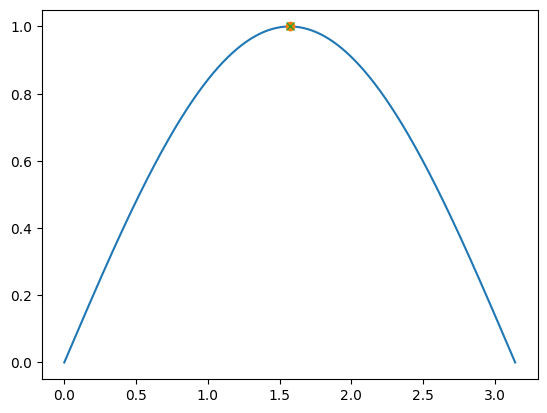

In [128]:
#plotting
x=np.linspace(0,np.pi,1000)
plt.plot(x,np.sin(x))
plt.plot(x1,np.sin(x1),marker='o')
plt.plot((np.pi)/2,np.sin((np.pi)/2),marker='x')
plt.show()